In [1]:
# Импортируем библиотеки, которые будем использовать в рамках работы
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

stock_market = pd.read_csv(
    "https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv",
    index_col=0)
display(stock_market.head())
stock_market.columns.unique()


,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

# Задание 1 (2 балла)
Посмотрите на тип данных столбца с датами. Преобразуйте текущий тип данных в формат pandas.Timestamp. С помощью функционала библиотеки Pandas создайте линейные графики динамики стоимости Bitcoin и Ethereum с января 2019 года по декабрь 2021 года.

In [2]:
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1242
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Natural_Gas_Vol.   1239 non-null   float64
 3   Crude_oil_Price    1243 non-null   float64
 4   Crude_oil_Vol.     1220 non-null   float64
 5   Copper_Price       1243 non-null   float64
 6   Copper_Vol.        1206 non-null   float64
 7   Bitcoin_Price      1243 non-null   object 
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   object 
 10  Platinum_Vol.      636 non-null    float64
 11  Ethereum_Price     1243 non-null   object 
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   object 
 14  Nasdaq_100_Price   1243 non-null   object 
 15  Nasdaq_100_Vol.    1242 non-null   float64
 16  Apple_Price        1243 

In [3]:
def str2float(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x.replace(',', ''))
    return df

<Axes: title={'center': 'Ethereum_Price'}, xlabel='Date'>

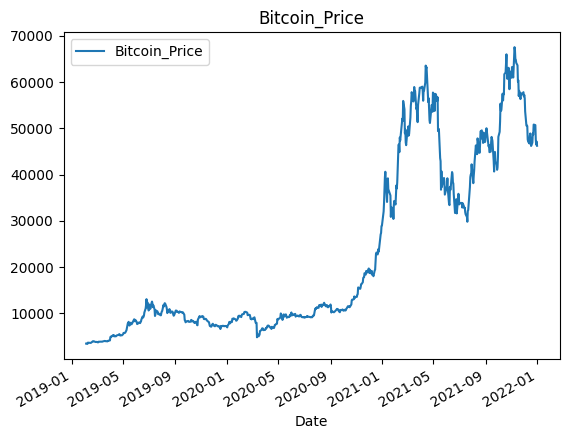

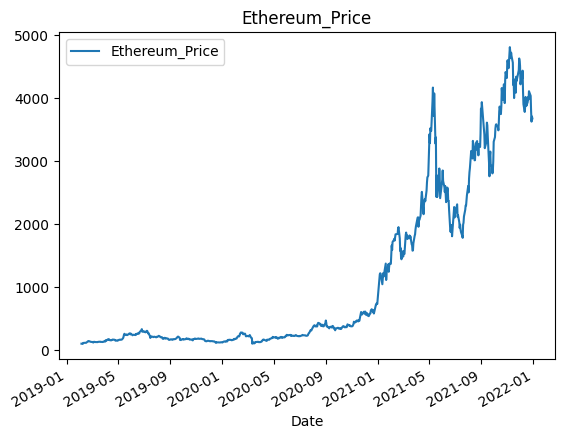

In [4]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'], format='%d-%m-%Y')
stock_market_bitcoin_etherium = stock_market[['Date', 'Bitcoin_Price', 'Ethereum_Price']].sort_values(by='Date')

stock_market_bitcoin_etherium = stock_market_bitcoin_etherium[(stock_market_bitcoin_etherium['Date'] >= '2019-01-01') & (stock_market_bitcoin_etherium['Date'] <= '2021-12-31')]

stock_market_bitcoin_etherium[['Bitcoin_Price', 'Ethereum_Price']] = stock_market_bitcoin_etherium[['Bitcoin_Price', 'Ethereum_Price']].pipe(str2float).astype('float')
stock_market_bitcoin_etherium.plot.line(x='Date', y='Bitcoin_Price', title='Bitcoin_Price')
stock_market_bitcoin_etherium.plot.line(x='Date', y='Ethereum_Price', title='Ethereum_Price')

# Задание 2 (2 балла)
Создайте один график, на котором будет изображена динамика цен на все полезные ископаемые в 2019–2024 гг. (Natural Gas, Crude Oil, Copper, Platinum, Gold). Цены рассчитайте относительно 4 февраля 2019 года (цены в этот день возьмите за 1, остальные рассчитайте как отношение цены в заданный день к цене 4 февраля 2019 года).

In [5]:
stock_market[['Platinum_Price', 'Gold_Price']] = stock_market[['Platinum_Price', 'Gold_Price']].pipe(str2float).astype('float')
stock_market_minerals = stock_market[['Date', 'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']].sort_values(by='Date')
stock_market_minerals

,Date,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Gold_Price
1242,2019-02-04,2.660,54.56,2.7975,822.50,1319.3
1241,2019-02-05,2.662,53.66,2.8205,821.35,1319.2
1240,2019-02-06,2.662,54.01,2.8400,807.10,1314.4
1239,2019-02-07,2.551,52.64,2.8320,800.80,1314.2
1238,2019-02-08,2.583,52.72,2.8140,802.20,1318.5
...,...,...,...,...,...,...
4,2024-01-29,2.490,76.78,3.8790,938.30,2034.9
3,2024-01-30,2.077,77.82,3.9110,931.70,2050.9
2,2024-01-31,2.100,75.85,3.9060,932.60,2067.4
1,2024-02-01,2.050,73.82,3.8535,922.30,2071.1


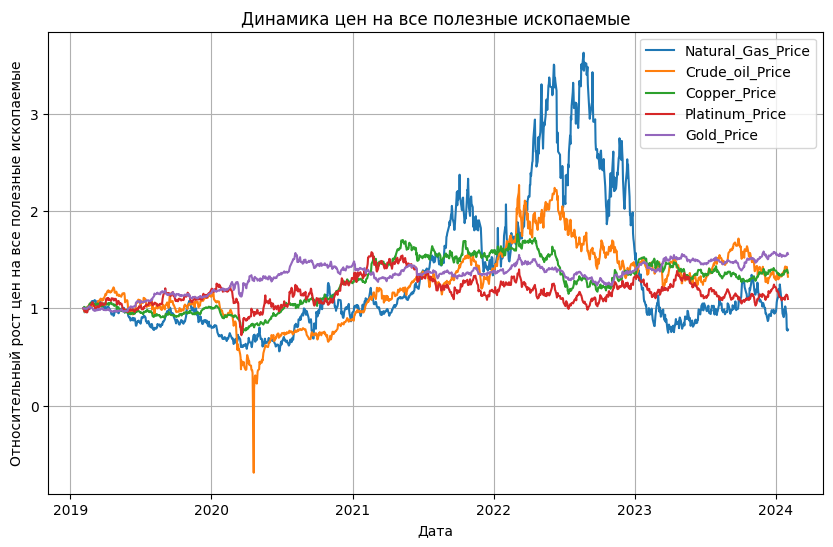

In [6]:
num_cols_minerals = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']
stock_market_minerals[num_cols_minerals] = stock_market_minerals[num_cols_minerals] / stock_market_minerals.loc[stock_market_minerals['Date'] == '2019-02-04', num_cols_minerals].values

plt.figure(figsize=(10, 6))
plt.plot(stock_market_minerals['Date'], stock_market_minerals[num_cols_minerals], label=num_cols_minerals)
plt.title('Динамика цен на все полезные ископаемые')
plt.xlabel('Дата')
plt.ylabel('Относительный рост цен на все полезные ископаемые')

plt.grid()
plt.legend()
plt.show()

# Задание 3 (4 балла)
Среди всех IT-компаний явно выделяются пять наиболее крупных. Они объединены аббревиатурой FAANG — Meta (Former Facebook), Amazon, Apple, Netflix, Google. Многие программисты мечтают попасть именно в эти компании, а инвесторы пристально следят за их деятельностью. Давайте узнаем, насколько это оправданно.

## Задание 3.1 (1 балл)
Создайте функцию, которая будет принимать на вход произвольное количество столбцов формата pandas.Series и возвращать сумму этих серий.

>Подсказка: используйте инструментарий *args и **kwags.

С помощью метода .apply() создайте новый столбец FAANG, который будет представлять собой сумму стоимости акций всех компаний, входящих в это символическое объединение.

In [7]:
stock_market['FAANG'] = stock_market[['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']].apply(lambda *x: sum(*x), axis=1)
stock_market_faang = stock_market[['Date', 'Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price', 'FAANG']]
stock_market_faang

,Date,Meta_Price,Amazon_Price,Apple_Price,Netflix_Price,Google_Price,FAANG
0,2024-02-02,474.99,171.81,185.85,564.64,142.38,1539.67
1,2024-02-01,394.78,159.28,186.86,567.51,141.16,1449.59
2,2024-01-31,390.14,155.20,184.40,564.11,140.10,1433.95
3,2024-01-30,400.06,159.00,188.04,562.85,151.46,1461.41
4,2024-01-29,401.02,161.26,191.73,575.79,153.51,1483.31
...,...,...,...,...,...,...,...
1238,2019-02-08,167.33,79.41,42.60,347.57,55.12,692.03
1239,2019-02-07,166.38,80.72,42.73,344.71,55.30,689.84
1240,2019-02-06,170.49,82.01,43.56,352.19,56.14,704.39
1241,2019-02-05,171.16,82.94,43.55,355.81,57.59,711.05


## Задание 3.2 (1 балла)
Аналогично заданию 3.1 рассчитайте все стоимости акций компаний относительно стоимости 4 февраля 2019 года (возьмите это значение за единицу, остальные — как соотношение).

Создайте линейный график, на котором будут изображены все графики роста стоимости компаний (входящих в FAANG) относительно 4 февраля 2019 года.
Нанесите на график темпы роста всего FAANG. Те компании, которые росли быстрее (большую часть времени), чем в среднем росли показатели по FAANG, покрасьте в оттенки синего, а те компании, которые росли медленнее, — в оттенки красного.
Добавьте легенду и остальные аттрибуты.

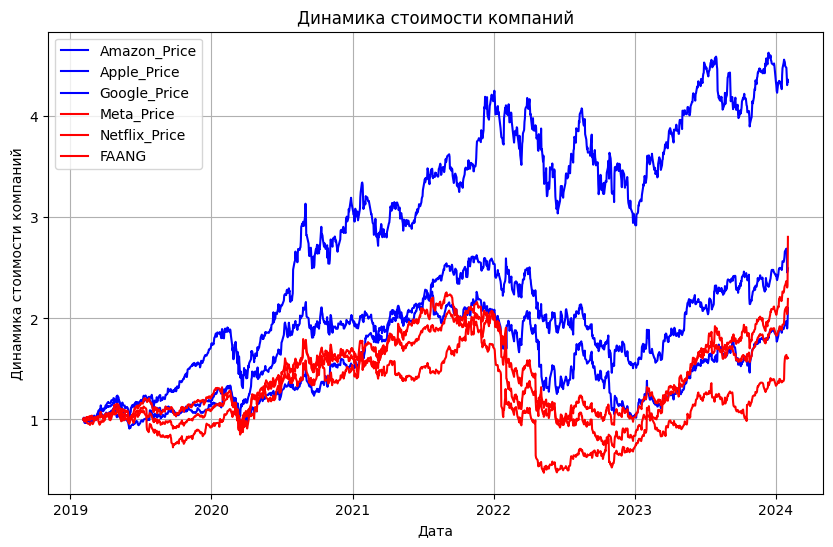

In [8]:
num_cols_faang = ['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price', 'FAANG']
stock_market_faang[num_cols_faang] = stock_market_faang[num_cols_faang] / stock_market_faang.loc[stock_market_faang['Date'] == '2019-02-04', num_cols_faang].values

average_growth = {}
for col in num_cols_faang:
    average_growth[col] = stock_market_faang[col].mean()

high_average_growth_cols = [col for col in average_growth.keys() if average_growth[col] > average_growth['FAANG']]
low_average_growth_cols = [col for col in average_growth.keys() if average_growth[col] <= average_growth['FAANG']]

plt.figure(figsize=(10, 6))
plt.plot(stock_market_faang['Date'], stock_market_faang[high_average_growth_cols], label=high_average_growth_cols, c='b')
plt.plot(stock_market_faang['Date'], stock_market_faang[low_average_growth_cols], label=low_average_growth_cols, c='r')
plt.title('Динамика стоимости компаний')
plt.xlabel('Дата')
plt.ylabel('Динамика стоимости компаний')

plt.grid()
plt.legend()
plt.show()

## Задание 3.3 (2 балла)
Что выгоднее — инвестиции в полезные ископаемые или в крупные компании?

Создайте линейный график с двумя линиями. Первая линия отвечает за полезные ископаемые.
Рассчитайте стоимость всех полезных ископаемых в ценах относительно 4 февраля 2019 года. Возьмите это значение за 1, остальные цены получите как отношение к этой цене. Например, если за месяц цены выросли на 10%, то полученное значение равно 1.1.
Подсчитайте среднее по всем полезным ископаемым по дням и добавьте получившиеся значения на график.
Проделайте аналогичную процедуру для всех компаний в датасете. Получившийся средний рост стоимости акций добавьте на график.
На основании полученных результатов ответьте на вопрос: во что лучше инвестировать — в полезные ископаемые или акции компаний?



In [9]:
stock_market_minerals['all_minerals'] = stock_market_minerals[['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']].mean(axis=1)
stock_market_minerals.head()

,Date,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Gold_Price,all_minerals
1242,2019-02-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1241,2019-02-05,1.000752,0.983504,1.008222,0.998602,0.999924,0.998201
1240,2019-02-06,1.000752,0.989919,1.015192,0.981277,0.996286,0.996685
1239,2019-02-07,0.959023,0.964809,1.012332,0.973617,0.996134,0.981183
1238,2019-02-08,0.971053,0.966276,1.005898,0.975319,0.999394,0.983588


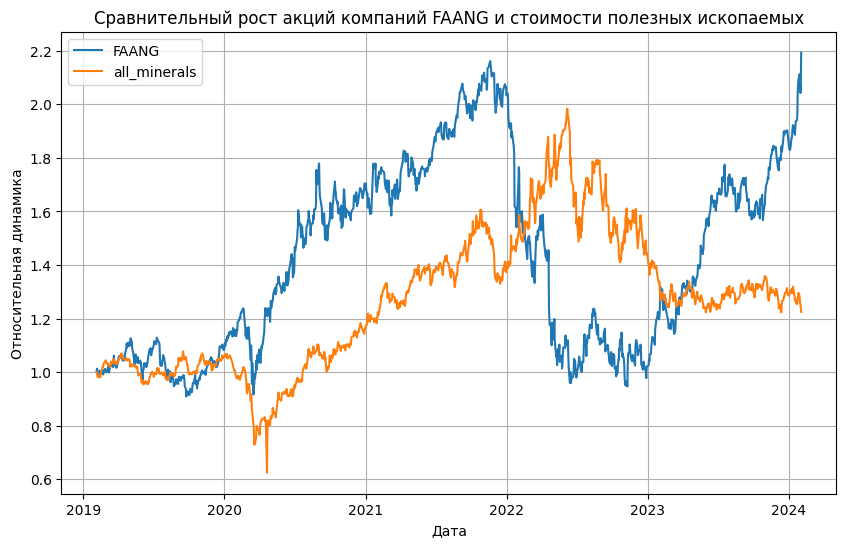

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(stock_market_faang['Date'], stock_market_faang['FAANG'], label='FAANG')
plt.plot(stock_market_minerals['Date'], stock_market_minerals['all_minerals'], label='all_minerals')
plt.title('Сравнительный рост акций компаний FAANG и стоимости полезных ископаемых')
plt.xlabel('Дата')
plt.ylabel('Относительная динамика')

plt.grid()
plt.legend()
plt.show()

Акции покупать выгоднее, но и рискованней

# Задание 4 (4 балла)
Попробуем использовать разные подходы для реализации одной задачи — визуализации волатильности акций разных компаний.

## Задание 4.1 (2 балла)
С помощью библиотек matplotlib и seaborn создайте поле (plt.subplots()), в котором на графиках для каждой компании будет изображена динамика роста стоимости акций. Отметьте зеленым все компании, стоимость акций которых была в два раза выше на начало 2024 года в сравнении с ценой в начале 2019 года.

In [11]:
stock_market.loc[stock_market['Date'].dt.year == 2024].sort_values('Date').reset_index().loc[0, 'Date']

Timestamp('2024-01-02 00:00:00')

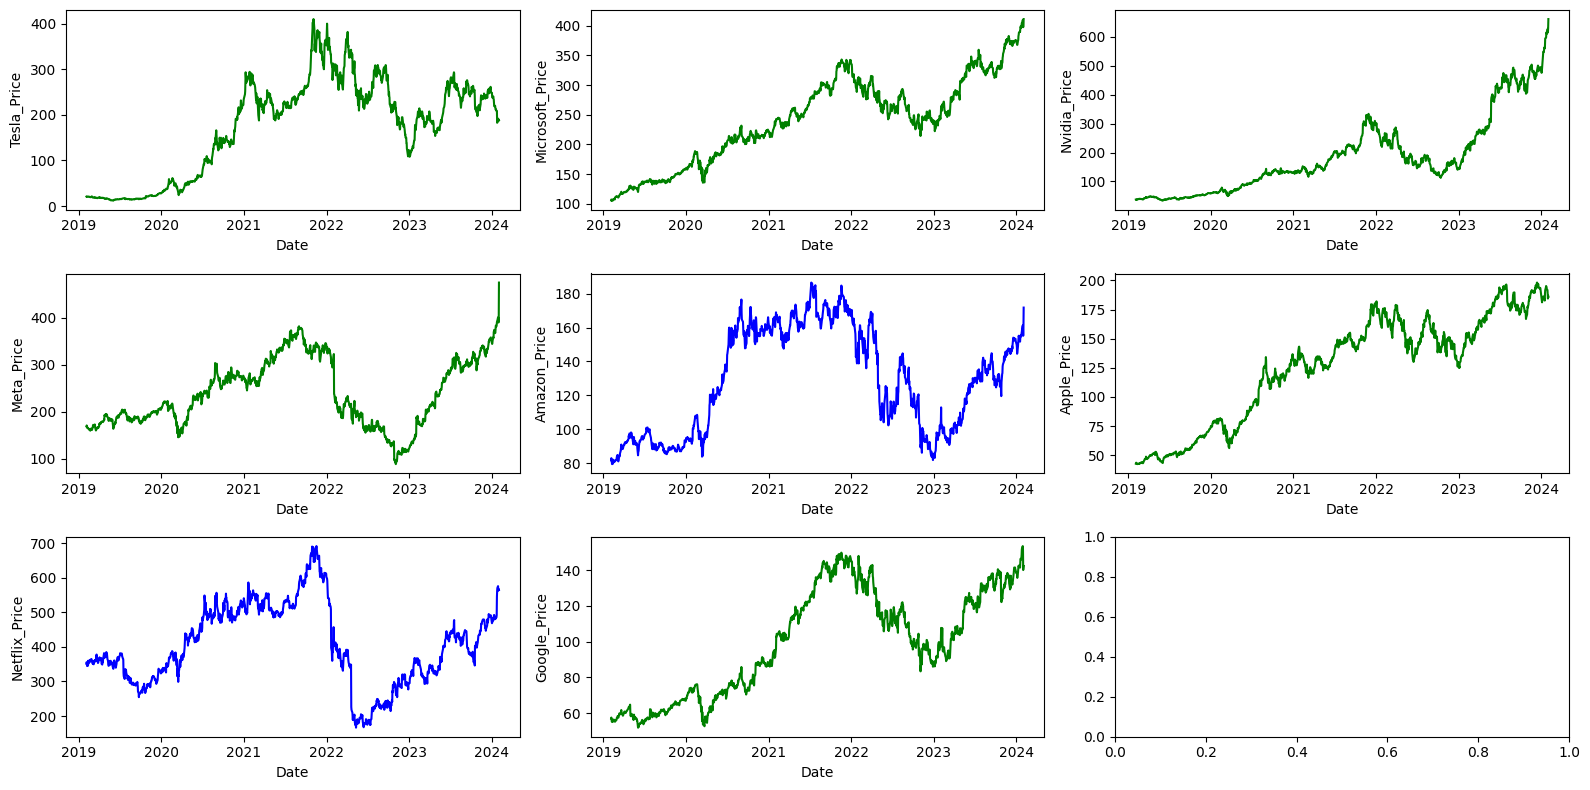

In [12]:
companies = ['Tesla_Price', 'Microsoft_Price', 'Nvidia_Price', 'Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']

fig, axs = plt.subplots(3, 3, figsize=(16, 8))

for idx, company in enumerate(companies):
    row = idx // 3
    col = idx % 3

    start_price, stop_price = stock_market.loc[stock_market['Date'] == '2019-02-04'][company].values[0], stock_market.loc[stock_market['Date'] == '2024-01-02'][company].values[0]

    clr = 'g' if (stop_price / start_price) >= 2 else 'b'

    sns.lineplot(data=stock_market, x='Date', y=company, ax=axs[row, col], c=clr)

plt.tight_layout()
plt.show()

## Задание 4.2 (2 балла)
С помощью библиотеки plotly создайте lineplot, в котором будет изображена динамика акций компаний за период с 2019 по 2024 гг. Добавьте на график кнопки для каждой компании, нажав на которые можно переключиться между визуализациями динамики изменения стоимости акций для разных компаний. Добавьте название и подписи к осям каждого графика.

In [17]:
# Создаем подграфики
fig = go.Figure()

for i, company in enumerate(companies):
    if i == 0:
        visible = True
    else:
        visible = False
    fig.add_trace(go.Scatter(x=stock_market['Date'], y=stock_market[company], mode='lines', name=company, visible=visible))

# Создаем кнопки
buttons = []
for i, company in enumerate(companies):
    label = company.split('_')[0]
    buttons.append(dict(method='update',
                        label=label,
                        args=[{'visible': [i == j for j in range(len(companies))]},
                              {'title': f'Динамика акций {label}'}]))

# Настраиваем оформление и размещение кнопок
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.1,
        y=0.5
    )]
)

# Устанавливаем заголовок и метки осей
fig.update_layout(title='динамика акций компаний', xaxis_title='Год', yaxis_title='Цена акций')

fig.show()